In [46]:
import numpy as np
import mne
# PYHRV IMPORTS
import biosppy
import pyhrv
import pyhrv.time_domain as td
import pyhrv.tools as tools
from pecg import Preprocessing as Pre
# MATH
import math

# SKLEARN
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, zero_one_loss
from sklearn.neural_network import MLPClassifier

# PANDAS
import pandas as pd

In [34]:
file = "ECG_data/01M_1_edited.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
info = data.info
channels = data.ch_names

Extracting EDF parameters from D:\Documents\Code\Jupyterlab\ECG_data\01M_1_edited.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [35]:
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: O1-Ref, O2-Ref, C3-Ref, C4-Ref, LOC-Ref, ROC-Ref, EKG
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 64.0 Hz
 meas_date: 2001-01-01 14:47:31 UTC
 nchan: 7
 projs: []
 sfreq: 128.0 Hz
 subject_info: 3 items (dict)
>


In [36]:
b = mne.events_from_annotations(data)
print(b[0])
raw_ecg = raw_data[6][896:]


Used Annotations descriptions: ['Event']
[[  1024      0      1]
 [193280      0      1]
 [274304      0      1]
 [285312      0      1]
 [300032      0      1]
 [316288      0      1]
 [324480      0      1]
 [343808      0      1]
 [384256      0      1]
 [399488      0      1]
 [410880      0      1]
 [429440      0      1]
 [504832      0      1]
 [524928      0      1]
 [532608      0      1]
 [559488      0      1]
 [577536      0      1]
 [589568      0      1]
 [604800      0      1]
 [625664      0      1]
 [633088      0      1]
 [651776      0      1]
 [873856      0      1]
 [887936      0      1]
 [932352      0      1]
 [933632      0      1]]


In [57]:
samp_rate = 128
event1_series = raw_ecg[0:300*samp_rate]
print(len(event1_series))

38400


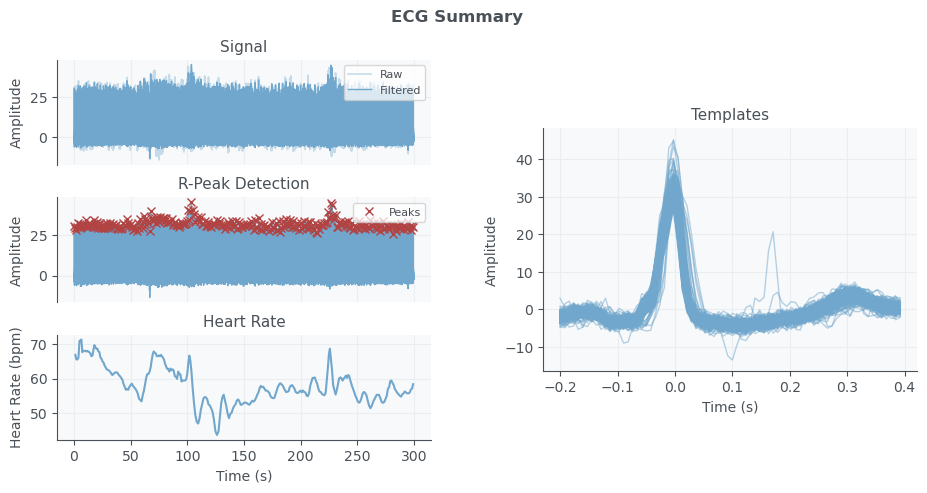

[   38   151   270   390   503   619   717   829   944  1058  1168  1283
  1397  1508  1622  1737  1849  1965  2084  2195  2303  2415  2529  2639
  2751  2869  2980  3100  3220  3335  3457  3582  3700  3825  3951  4070
  4197  4326  4448  4573  4700  4821  4946  5075  5199  5326  5458  5585
  5720  5858  5991  6125  6264  6391  6522  6658  6789  6923  7062  7197
  7337  7488  7626  7769  7905  8034  8163  8287  8410  8539  8659  8775
  8892  9003  9115  9234  9346  9462  9581  9692  9809  9926 10039 10158
 10278 10397 10521 10645 10764 10893 11012 11134 11261 11382 11514 11642
 11767 11886 12019 12144 12276 12407 12532 12664 12793 12909 13023 13139
 13263 13395 13542 13698 13861 14027 14188 14336 14479 14626 14761 14901
 15049 15188 15340 15491 15636 15797 15971 16151 16324 16486 16624 16763
 16908 17041 17192 17353 17503 17667 17816 17963 18115 18258 18401 18544
 18685 18833 18984 19124 19270 19418 19559 19706 19857 19998 20140 20287
 20430 20569 20710 20846 20980 21112 21244 21381 21

In [59]:
signal, rpeaks = biosppy.signals.ecg.ecg(event1_series, show=True, sampling_rate=128)[1:3]
nni = tools.nn_intervals(rpeaks)
print(rpeaks)